Задача 1

Объясняемая переменная y зависит от двух категориальных факторов A и B, причём фактор A имеет 3 уровня, а фактор B - 4 уровня. Результаты наблюдений приведены в таблице:

С помощью двухфакторного дисперсионного анализа проверьте влияние каждого из факторов на переменную y.

In [3]:
import numpy as np

m = 3
k = 4

y = [[2.68, 3.29, 2.88, 4.45],
     [4.12, 4.96, 5.09, 5.22],
     [5.52, 4.50, 5.42, 5.29]]

y = np.array(y)

ssa = k * ((y[0, :].mean() - y.mean())**2 + (y[1, :].mean() - y.mean())**2 + (y[2, :].mean() - y.mean())**2).sum()
ssb = m * ((y[:, 0].mean() - y.mean())**2 + (y[:, 1].mean() - y.mean())**2 + (y[:, 2].mean() - y.mean())**2 + (y[:, 3].mean() - y.mean())**2).sum()

ssw = 0

for i in range(3):
    for j in range(4):
        ssw += (y[i, j] - y[i, :].mean() - y[:, j].mean() + y.mean())**2
        
Fa = ssa**2*(k-1)/ssw**2
Fb = ssb**2*(m-1)/ssw**2


In [27]:
from scipy import stats

n = k*m

k1a = m - 1
k2a = n - m

alpha = 0.05

ta = stats.f.ppf(1 - alpha, k1a, k2a)
print(f'Статистика Fa = {Fa} попала в критическую область ({ta}, +∞). Результат - не случайность при уровне значимости в 0.05.')

k1b = k - 1
k2b = n - k

alpha = 0.05

tb = stats.f.ppf(1 - alpha, k1b, k2b)
print(f'Статистика Fb = {Fb} не попала в критическую область ({tb}, +∞). Результат - случайность при уровне значимости в 0.05.')

Статистика Fa = 49.51886301953694 попала в критическую область (4.25649472909375, +∞). Результат - не случайность при уровне значимости в 0.05.
Статистика Fb = 0.9615863719464893 не попала в критическую область (4.06618055135116, +∞). Результат - случайность при уровне значимости в 0.05.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('bmh')

In [4]:
SP = pd.read_csv('SnP500.csv').dropna()
RU = pd.read_csv('RUT.csv').dropna()
TR = pd.read_csv('TREAST.csv')
VI = pd.read_csv('VIX.csv')

In [5]:
SP = SP[SP.Date > '2000-12-31']
SP['med'] = (SP.Open + SP.Close)/2

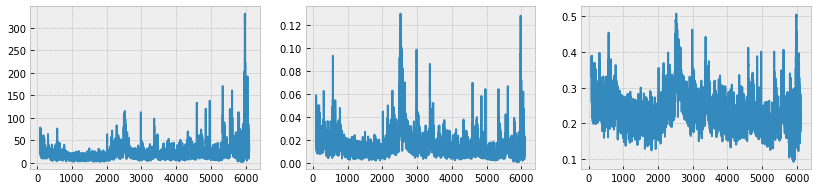

In [6]:
d = SP.High - SP.Low
p = ((SP.High - SP.Low)/SP.med)
pm = ((SP.High - SP.Low)/SP.med)**(1/3)

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(14, 3)
ax1, ax2, ax3 = ax.flatten()
ax1.plot(d)
ax2.plot(p)
ax3.plot(pm)
plt.show()

In [8]:
SP.describe()

,Open,High,Low,Close,Adj Close,Volume,med
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03,4980.000000
mean,1638.568072,1650.103669,1626.510291,1639.306889,1639.306889,1.369870e+06,1638.937481
std,655.292954,658.520350,652.301876,656.086348,656.086348,8.482371e+05,655.615776
min,674.750000,694.750000,665.750000,676.000000,676.000000,0.000000e+00,682.375000
25%,1146.937500,1158.437500,1137.750000,1148.187500,1148.187500,7.247290e+05,1146.687500
50%,1359.875000,1370.500000,1350.375000,1359.750000,1359.750000,1.284896e+06,1359.750000
75%,2073.000000,2082.500000,2060.562500,2074.250000,2074.250000,1.844430e+06,2072.312500
max,3391.750000,3397.500000,3382.000000,3387.750000,3387.750000,6.659472e+06,3385.000000


In [7]:
pm = pm.reset_index(drop=True)
SP.reset_index(drop=True, inplace=True)

In [1]:
win = 200

for i in range(0, len(p)):
    arr = []
    arr.append(pm[i:i+win])
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.hist(arr, bins=15)
    ax1.set_xlim([0.05, 0.55])
    ax1.set_ylim([0, 65])
    ax1.set_title('Histogram of a sliding sample of the S&P 500 index')
    ax2.plot(SP.med, color='g')
    ax2.plot(SP.med[i:i+win], color='r')
    ax2.set_ylim([600, 3500])
    ax2.set_xlim([0, 5000])
    plt.title(f'{SP.Date[SP.index[i]]}')
    plt.savefig(f'E:/Temp/hist/{SP.Date[SP.index[i]]}.png')
    plt.clf()
    #plt.show()

In [9]:
win = 200

for i in range(0, len(p), 150):
    arr = []
    arr.append(pm[i:i+win])
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(10, 10)
        
    samples = np.array(arr)

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    plt.title(f'{SP.Date[SP.index[i]]}')
    plt.savefig(f'E:/Temp/norm/{SP.Date[SP.index[i]]}.png')
    plt.clf()
    #plt.show()

In [73]:
TRV = TR.set_index('DATE')
TRV.index = pd.to_datetime(TRV.index)
SPM = SP[['Date', 'med']]
SPM = SPM.set_index('Date')
SPM.index = pd.to_datetime(SPM.index)
SPMTRV = SPM[SPM.index > '2002-12-17']
SPMTRV = SPMTRV.join(TRV)
SPMTRV.TREAST = SPMTRV.TREAST.fillna(method='ffill')
corr = SPMTRV.med.rolling(window=100).mean().rolling(window=100).corr(SPMTRV.TREAST)

c:\python37\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000270A8F36E88> has a label of '_line2' which cannot be automatically added to the legend.


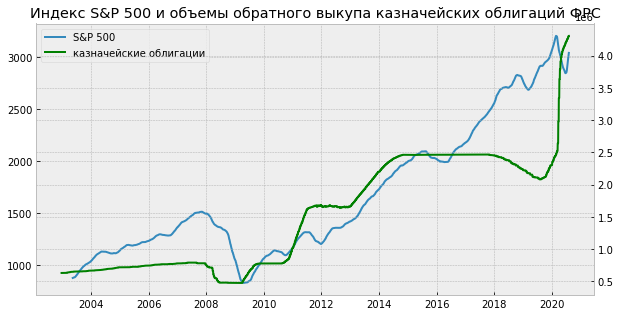

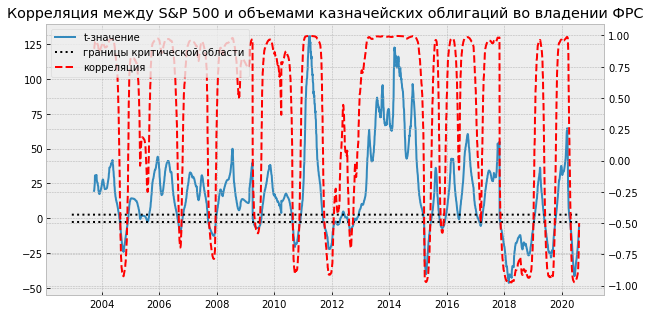

In [74]:
t = corr * (100 - 2)**(1/2) / (1 - corr ** 2)**(1/2)
t1 = stats.t.ppf(0.01 / 2, df=100 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=100 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})

fig, ax = plt.subplots()
ax.set_title('Индекс S&P 500 и объемы обратного выкупа казначейских облигаций ФРС')
fig.set_size_inches(10, 5)
lns1 = ax.plot(SPMTRV.med.rolling(window=100).mean(), label='S&P 500')
ax2 = ax.twinx()
lns2 = ax2.plot(SPMTRV.TREAST, c='g', label='казначейские облигации')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title('Корреляция между S&P 500 и объемами казначейских облигаций во владении ФРС')
ax2 = ax.twinx()
lns1 = ax.plot(t, label='t-значение')
lns2 = ax.plot(corrt.t1, linestyle=':', c='k', label='границы критической области')
lns3 = ax.plot(corrt.t2, linestyle=':', c='k')
lns4 = ax2.plot(corr, linestyle='--', c='r', label='корреляция')
ax2.set_frame_on(True)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper left')

plt.show()

In [69]:
RU = RU[RU.Date > '2000-12-31']
RU['medr'] = (RU.Open + RU.Close)/2
SPM = SP[['Date', 'med']]
RUM = RU[['Date', 'medr']]
SPM = SPM.set_index('Date')
SPM.index = pd.to_datetime(SPM.index)
RUM = RUM.set_index('Date')
RUM.index = pd.to_datetime(RUM.index)
SPMRUM = SPM.join(RUM)
SPMRUM.medr = SPMRUM.medr.fillna(method='ffill')
corr = SPMRUM.med.rolling(window=100).corr(SPMRUM.medr)

c:\python37\lib\site-packages\ipykernel_launcher.py:30: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002709D348448> has a label of '_line2' which cannot be automatically added to the legend.


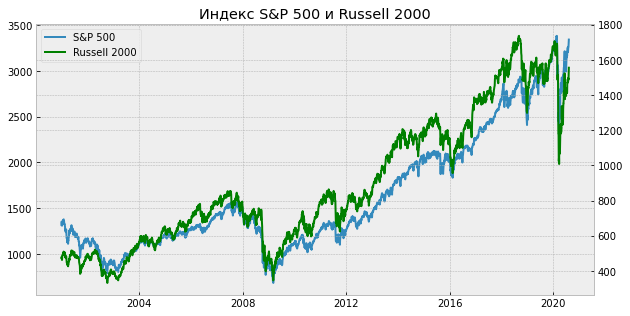

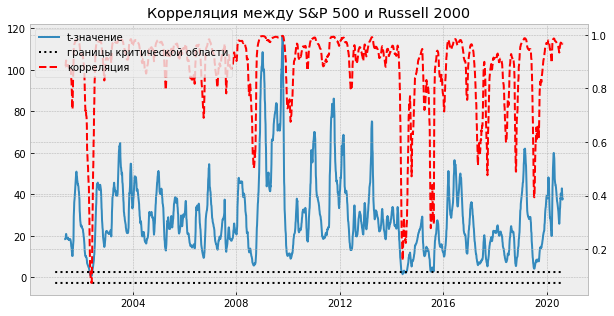

In [72]:
t = corr * (100 - 2)**(1/2) / (1 - corr ** 2)**(1/2)
t1 = stats.t.ppf(0.01 / 2, df=100 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=100 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})

fig, ax = plt.subplots()
ax.set_title('Индекс S&P 500 и Russell 2000')
fig.set_size_inches(10, 5)
lns1 = ax.plot(SPMRUM.med, label='S&P 500')
ax2 = ax.twinx()
lns2 = ax2.plot(SPMRUM.medr, c='g', label='Russell 2000')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.set_title('Корреляция между S&P 500 и Russell 2000')
ax2 = ax.twinx()
lns1 = ax.plot(t, label='t-значение')
lns2 = ax.plot(corrt.t1, linestyle=':', c='k', label='границы критической области')
lns3 = ax.plot(corrt.t2, linestyle=':', c='k')
lns4 = ax2.plot(corr, linestyle='--', c='r', label='корреляция')
ax2.set_frame_on(True)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper left')

plt.show()

In [184]:
SPmV = pd.DataFrame(SP[['Date', 'med', 'Volume']])
SPmV['mV'] = SPmV.Volume/SPmV.med
SPmV = SPmV.set_index('Date')
SPmV.index = pd.to_datetime(SPmV.index)
TRV = TR.set_index('DATE')
TRV.index = pd.to_datetime(TRV.index)
SPmVTRV = SPmV[SPmV.index > '2002-12-17'].join(TRV)
SPmVTRV.TREAST = SPmVTRV.TREAST.fillna(method='ffill')
corr = SPmVTRV.mV.rolling(window=300).mean().rolling(window=1000).corr(SPmVTRV.TREAST)

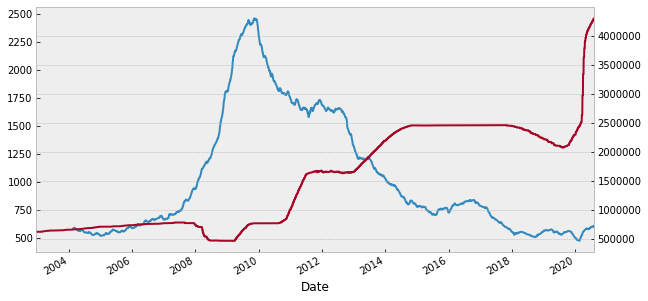

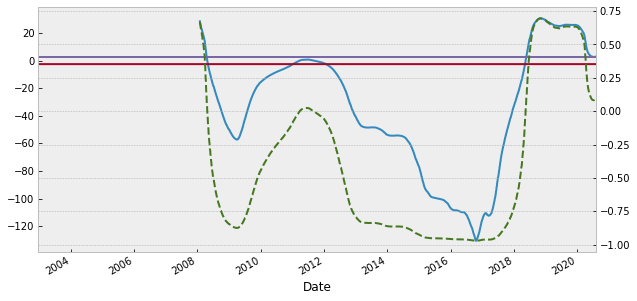

In [185]:
t = corr * (1000 - 2)**(1/2) / (1 - corr ** 2)**(1/2)
t1 = stats.t.ppf(0.01 / 2, df=1000 - 2)
t2 = stats.t.ppf(1 - 0.01 / 2, df=1000 - 2)

corrt = pd.DataFrame({'corr': corr, 't1': np.ones(len(t))*t1, 't2': np.ones(len(t))*t2})

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(SPmVTRV.mV.rolling(window=300).mean())
ax = SPmVTRV.TREAST.plot(secondary_y=True)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(t)
ax.plot(corrt.t1)
ax.plot(corrt.t2)
ax = corr.plot(secondary_y=True, linestyle='--')
plt.show()